# Introduction
This notebook summarizes the predictive modeling results of the Heart Diseases UCI (https://www.kaggle.com/ronitf/heart-disease-uci) to identify relationship between heart disease and various other features. 

## Step1:  Select and load python libraries
Python libraries loaded to preform the prelimnary EDA include Pandas, Numpy, sklearn, Matplotlb, and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve
import eli5 

# Step 2:  Load Variables from model prediction (i.e. Part 2)

In [2]:
locData=r'C:\Users\Lisa\Documents\Training\CoderGirl\Project\Data'
model,cm,xtrainScaled,ytrain,xtestScaled,ytest,yhat_quant=pickle.load(open(locData+'\\finalized_model.sav','rb'))

# Step 3:  Create a visual depiction of the random forest solution

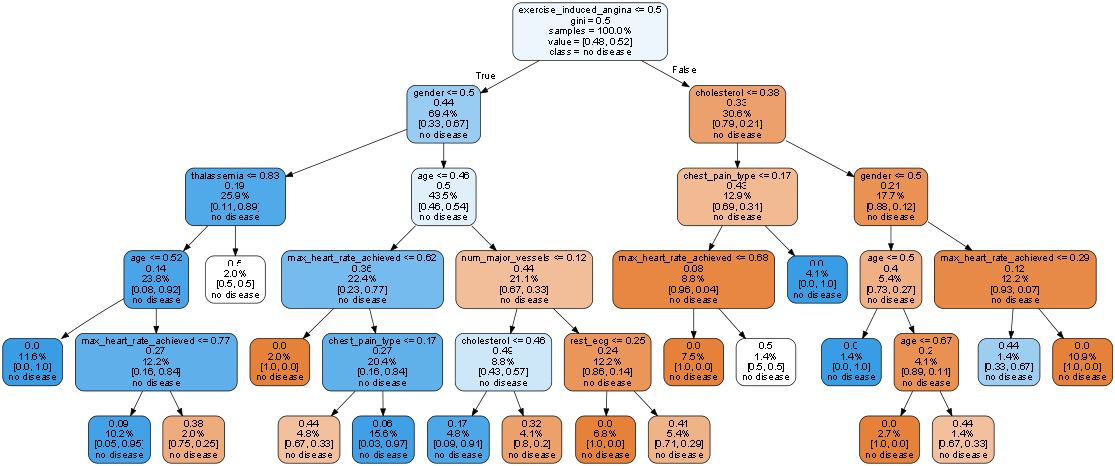

In [3]:
estimator=model.estimators_[1]
feature_names=[i for i in xtrainScaled.columns]

yTrainStr=ytrain.astype('str')
yTrainStr[yTrainStr=='0']='no disease'
yTrainStr[yTrainStr=='1']='disease'
yTrainStr=yTrainStr.values


export_graphviz(estimator, out_file='tree.dot', 
                feature_names=feature_names,
                class_names=yTrainStr,
                rounded=True,
                proportion=True, 
                label='root',
                precision=2,
                filled=True)

from subprocess import run
run(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=50'],shell=True)

from IPython.display import Image
Image(filename='tree.png')

# Step 4:  Create heatmap of confusion matrix
Generally, false true negatives were captured with the most accuracy.

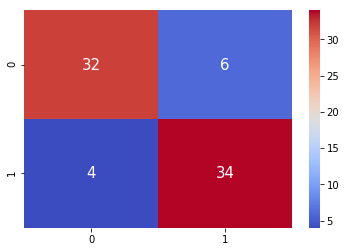

In [4]:
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='coolwarm')

# Step 5:  Compute and plot AUC/ROC Curve
The computed AUC score was 0.94, suggesting that there is a 94 percent chance that the model will be able to distingish between accurately predicting disease (i.e. true positive) and a false negative, as shown by the area under the ROC curve.

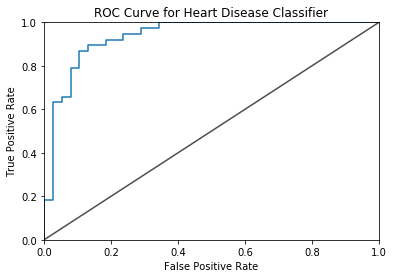

AUC Score:   0.9369806094182827


In [5]:
fpr,tpr,thresholds=roc_curve(ytest,yhat_quant)

fig,ax=plt.subplots()
ax.plot(fpr,tpr)
ax.plot([0, 1],[0, 1],transform=ax.transAxes,c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC Curve for Heart Disease Classifier', fontweight = 30)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

from sklearn.metrics import auc
auc = auc(fpr,tpr)
print("AUC Score:  ",auc)

# Step 6:  Evaluate parameter importance
The eli5 module was used to measure how model scores decrease with the exclusion of a feature.  In general, most of the features contributed to model improvement.  Chest pain type yelded the largest contriubtion to model score (0.0447) and age had the lowest contribution to model score (0.0026).  Fasting blood sugar and max heart rate achieved seemed to have no and a negative effect on model score.  Accordingly, both fasting blood suguar and max heart rate achieved could be removed if the model were to be reevalated.  

In [6]:
perm=eli5.sklearn.PermutationImportance(model).fit(xtestScaled,ytest)
eli5.show_weights(perm,feature_names=xtestScaled.columns.tolist())

Weight,Feature
0.0421 ± 0.0510,chest_pain_type
0.0316 ± 0.0357,num_major_vessels
0.0289 ± 0.0105,thalassemia
0.0289 ± 0.0197,gender
0.0211 ± 0.0316,max_heart_rate_achieved
0.0184 ± 0.0394,st_depression
0.0105 ± 0.0258,st_slope
0.0053 ± 0.0129,rest_ecg
0.0026 ± 0.0349,cholesterol
0.0000 ± 0.0235,exercise_induced_angina


# Project Summary:


Exploratory data analysis, modeling, and results summary were conducted on the Heart Diseases UCI (https://www.kaggle.com/ronitf/heart-disease-uci) dataset.  

Exploratory data analysis (EDA) was conducted to evaluate feature data, including identifying:  duplicates, data types, and outliers.  Additional efforts were made to evaluate the relationship between each feature and the response variable (i.e. target).  In general, the dataset was composed of integer and float values with nearly no outliers or duplicate values.  

The RandomForestClassifier for predictive modeling.  The RandomForestClassifier was selected for this analysis after evaluating mulitple commonly used predictive binary classification models as it was a top performer with default input paramers and is widely used.  Hyper-parameters within the random forest classifer were optimized using the GridSearchCV function with a 5-fold cross-validatiion.  Hyper-parmeter tuning increased training and test accuracy of the default model by 13 and 6 percent, respectively.  

Predictive modeling results were summarized using a random forest flow chart, classification matrix heat map, and AUC ROC curve.  An AUC score of 0.94 was obtained from the model output, suggest that the model can predict a true postive with 94 percent accuracy.  It was also of interest to identify feature contribution to model improvement.  Largely, most features contributed to model improvement; however, fasting blood sugar and max heart rate achieved seemed to have no and a negative effect on model score.  Accordingly, both fasting blood suguar and max heart rate achieved could be removed if the model were to be reevalated. 